## INTRUSION DETECTION SYSTEM USING KDD DATASET

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=50
np.random.seed(50)

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]

In [3]:
import random
rows_to_keep=np.random.choice(list(range(1,4800000)),100000)

In [5]:
data=pd.read_csv('./kddcup.data.corrected',names=datacols)

###  <font color = 'red'> NOTE: Actual data file contains 48 lacs data points , but using this much data would make computation and processing very slow . Hence , we are taking only 1 lac points</font>

In [6]:
data=data.loc[rows_to_keep]

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
1980081,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1152481,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,10,1.0,1.0,0.0,0.0,0.09,0.07,0.0,255,10,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
677998,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,19,1.0,1.0,0.0,0.0,0.08,0.06,0.0,255,19,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
2418655,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1554662,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,509,509,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1980081 to 1116151
Data columns (total 42 columns):
duration                       100000 non-null int64
protocol_type                  100000 non-null object
service                        100000 non-null object
flag                           100000 non-null object
src_bytes                      100000 non-null int64
dst_bytes                      100000 non-null int64
land                           100000 non-null int64
wrong_fragment                 100000 non-null int64
urgent                         100000 non-null int64
hot                            100000 non-null int64
num_failed_logins              100000 non-null int64
logged_in                      100000 non-null int64
num_compromised                100000 non-null int64
root_shell                     100000 non-null int64
su_attempted                   100000 non-null int64
num_root                       100000 non-null int64
num_file_creations             

In [9]:
data['attack'].value_counts()

smurf.          57629
neptune.        22141
normal.         19326
satan.            281
ipsweep.          255
portsweep.        235
nmap.              43
back.              43
warezclient.       24
teardrop.          16
pod.                5
land.               1
imap.               1
Name: attack, dtype: int64

#### Map attack field to attack class
NSL-KDD dataset has 42 attributes for each connection record including class label containing attack types. The attack types are categorized into four attack classes as described by Mahbod Tavallaee et al. in A Detailed analysis of the KDD CUP 99 Data Set as:
<br>
<p>
    <b>Denial of Service (DoS)</b>: is an attack in which an adversary directed a deluge of traffic requests to a system in order to make the computing or memory resource too busy or too full to handle legitimate requests and in the process, denies legitimate users access to a machine.
</p>
<br>
<p>
    <b>Probing Attack (Probe)</b>: probing network of computers to gather information to be used to compromise its security controls.
</p>
<br>
<p>
    <b>User to Root Attack (U2R)</b>: a class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
</p>
<br>
<p>
    <b>Remote to Local Attack (R2L)</b>: occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
</p>


In [10]:
mapping = {'ipsweep.': 'Probe','satan.': 'Probe','nmap.': 'Probe','portsweep.': 'Probe','saint.': 'Probe','mscan.': 'Probe',
        'teardrop.': 'DoS','pod.': 'DoS','land.': 'DoS','back.': 'DoS','neptune.': 'DoS','smurf.': 'DoS','mailbomb.': 'DoS',
        'udpstorm.': 'DoS','apache2.': 'DoS','processtable.': 'DoS',
        'perl.': 'U2R','loadmodule.': 'U2R','rootkit.': 'U2R','buffer_overflow.': 'U2R','xterm.': 'U2R','ps.': 'U2R',
        'sqlattack.': 'U2R','httptunnel.': 'U2R',
        'ftp_write.': 'R2L','phf.': 'R2L','guess_passwd.': 'R2L','warezmaster.': 'R2L','warezclient.': 'R2L','imap.': 'R2L',
        'spy.': 'R2L','multihop.': 'R2L','named.': 'R2L','snmpguess.': 'R2L','worm.': 'R2L','snmpgetattack.': 'R2L',
        'xsnoop.': 'R2L','xlock.': 'R2L','sendmail.': 'R2L',
        'normal.': 'Normal'
        }

In [11]:
data['attack_class']=data['attack'].apply(lambda x: mapping[x])
data.drop('attack',axis=1,inplace=True)
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
1980081,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,DoS
1152481,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,10,1.0,1.0,0.0,0.0,0.09,0.07,0.0,255,10,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,DoS
677998,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,19,1.0,1.0,0.0,0.0,0.08,0.06,0.0,255,19,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0,DoS


### <font color='green'>Splitting the data into Train and Test </font>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Y=data['attack_class']
data.drop('attack_class',axis=1,inplace=True)

In [14]:
Y.head()

1980081    DoS
1152481    DoS
677998     DoS
2418655    DoS
1554662    DoS
Name: attack_class, dtype: object

In [15]:
X_train,X_test,y_train,y_test= train_test_split(data,Y,train_size=0.7,random_state=42)

In [16]:
X_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
483583,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
2215045,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
1105197,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,10,1.0,1.0,0.0,0.0,0.08,0.08,0.0,255,10,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0


### <font color='purple'>EXPLORATORY DATA ANALYSIS </font>

In [17]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,70000.000000,7.000000e+04,7.000000e+04,70000.0,70000.000000,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,54.062729,1.764437e+04,5.866169e+02,0.0,0.000514,0.0,0.014043,0.000014,0.137714,0.007200,0.000086,0.000029,0.012157,0.001114,0.000071,0.001014,0.0,0.0,0.000886,335.813486,295.710357,0.179233,0.179311,0.060388,0.060456,0.787098,0.021188,0.027724,233.599714,188.509329,0.750455,0.031245,0.606096,0.006391,0.179363,0.179198,0.060685,0.060379
std,795.238078,4.412903e+06,1.228964e+04,0.0,0.038169,0.0,0.510874,0.003780,0.344602,1.413043,0.009258,0.007559,1.596421,0.108623,0.008451,0.035240,0.0,0.0,0.029748,211.221032,245.872361,0.382992,0.383313,0.237446,0.237745,0.391099,0.081698,0.139065,63.209233,106.360619,0.413311,0.109842,0.480923,0.041587,0.382993,0.383324,0.236203,0.236078
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.200000e+01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,122.750000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,36.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42658.000000,1.167519e+09,2.642709e+06,0.0,3.000000,0.0,30.000000,1.000000,1.000000,371.000000,1.000000,2.000000,417.000000,22.000000,1.000000,3.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We can see that for <font color='green'>land, num_outbound_cmds, is_host_login </font> --> all values are zero , hence they are redundant columns and therefore removing them both from train as well as test data

In [18]:
X_train.drop(columns=['land','num_outbound_cmds','is_host_login'],axis=1,inplace=True)
X_test.drop(columns=['land','num_outbound_cmds','is_host_login'],axis=1,inplace=True)


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
X_train.shape,X_test.shape

((70000, 38), (30000, 38))

In [20]:
type(y_train.value_counts())

pandas.core.series.Series

In [21]:
# Attack Class Distribution
attack_class_freq_train = pd.DataFrame(y_train.value_counts())
attack_class_freq_test = pd.DataFrame(y_test.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1,sort=False) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
DoS,55771,79.67,24064,80.21
Normal,13650,19.50,5676,18.92
Probe,564,0.81,250,0.83
R2L,15,0.02,10,0.03


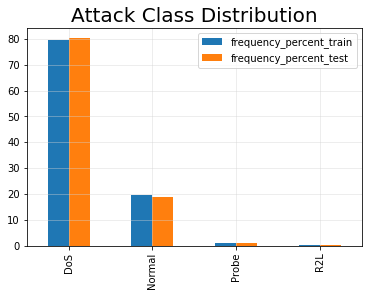

In [22]:
# Attack class bar plot
%matplotlib inline
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


### Scaling Numerical Attributes

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['float64','int64']).columns
scaler.fit(X_train.select_dtypes(include=['float64','int64']))
sc_train = scaler.transform(X_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.transform(X_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = X_train.select_dtypes(include=['object']).copy()
cattest = X_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)



In [25]:
y_train=pd.DataFrame(y_train,columns=['attack_class'])
y_test=pd.DataFrame(y_test,columns=['attack_class'])


In [26]:
y_train.head()

,attack_class
483583,DoS
2215045,DoS
1105197,DoS
823309,Normal
963852,DoS


In [27]:
y_train=y_train.apply(encoder.fit_transform)
y_test=y_test.apply(encoder.fit_transform)

In [28]:
y_train.head(3)

,attack_class
483583,0
2215045,0
1105197,0


In [29]:
encoder.inverse_transform([0,1,2,3])

array(['DoS', 'Normal', 'Probe', 'R2L'], dtype=object)

In [30]:
sc_traindf.reset_index(drop=True,inplace=True)
traincat.reset_index(drop=True,inplace=True)
sc_testdf.reset_index(drop=True,inplace=True)
testcat.reset_index(drop=True,inplace=True)
X_train=pd.concat([sc_traindf,traincat],axis=1)
X_test=pd.concat([sc_testdf,testcat],axis=1)
# X_train=sc_traindf.append(traincat,sort=False)
# X_test=sc_testdf.append(testcat,sort=False)

In [31]:
print(X_train.head(3));
print(X_train.shape);

   duration  src_bytes  dst_bytes  wrong_fragment  urgent       hot  \
0 -0.067984  -0.003765  -0.047733       -0.013474     0.0 -0.027488   
1 -0.067984  -0.003765  -0.047733       -0.013474     0.0 -0.027488   
2 -0.067984  -0.003998  -0.047733       -0.013474     0.0 -0.027488   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0           -0.00378  -0.399635        -0.005095   -0.009259      -0.00378   
1           -0.00378  -0.399635        -0.005095   -0.009259      -0.00378   
2           -0.00378  -0.399635        -0.005095   -0.009259      -0.00378   

   num_root  num_file_creations  num_shells  num_access_files  is_guest_login  \
0 -0.007615           -0.010258   -0.008452         -0.028783       -0.029774   
1 -0.007615           -0.010258   -0.008452         -0.028783       -0.029774   
2 -0.007615           -0.010258   -0.008452         -0.028783       -0.029774   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0  0.829

### Feature Selection

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train.values.ravel());
# extract important features
score = np.round(rfc.feature_importances_,3)


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
import matplotlib.pyplot as plt

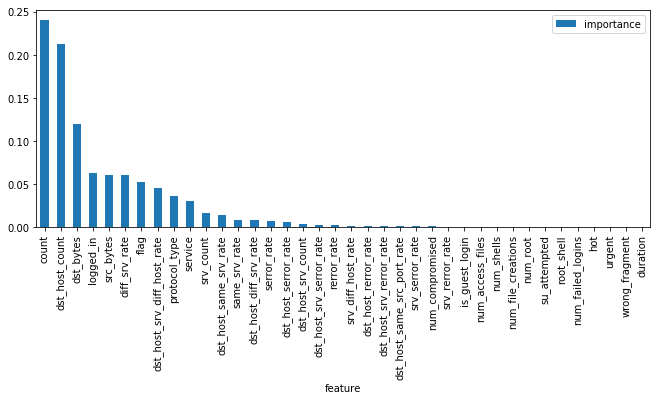

In [34]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [35]:
final_features=list(importances[:10].index)

In [36]:
final_features


['count',
 'dst_host_count',
 'dst_bytes',
 'logged_in',
 'src_bytes',
 'diff_srv_rate',
 'flag',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service']

In [37]:
X_train2=X_train.loc[:,final_features]
X_test2=X_test.loc[:,final_features]

In [38]:
X_train2.shape

(70000, 10)

In [39]:
X_train2.describe()

,count,dst_host_count,dst_bytes,logged_in,src_bytes,diff_srv_rate,flag,dst_host_srv_diff_host_rate,protocol_type,service
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,7.000000e+04,70000.000000,70000.000000
mean,-4.892594e-17,-2.127568e-16,8.120488e-19,7.024222e-17,-1.319579e-18,9.744586e-18,7.046486,2.212833e-17,0.461886,23.177843
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.895160,1.000007e+00,0.575086,13.164130
min,-1.585145e+00,-3.695685e+00,-4.773296e-02,-3.996354e-01,-3.998388e-03,-2.593475e-01,0.000000,-1.536885e-01,0.000000,0.000000
25%,-1.008730e+00,3.385651e-01,-4.773296e-02,-3.996354e-01,-3.988871e-03,-2.593475e-01,8.000000,-1.536885e-01,0.000000,14.000000
50%,8.246705e-01,3.385651e-01,-4.773296e-02,-3.996354e-01,-3.880551e-03,-2.593475e-01,8.000000,-1.536885e-01,0.000000,14.000000
75%,8.294049e-01,3.385651e-01,-4.773296e-02,-3.996354e-01,-3.764527e-03,-2.593475e-01,8.000000,-1.536885e-01,1.000000,44.000000
max,8.294049e-01,3.385651e-01,2.149893e+02,2.502281e+00,2.645674e+02,1.198095e+01,9.000000,2.389235e+01,2.000000,62.000000


### FITTING THE MODELS

In [40]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train2, y_train.values.ravel()); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(multi_class='auto',n_jobs=-1, random_state=0,solver='lbfgs')
LGR_Classifier.fit(X_train2, y_train.values.ravel());

# Train Gaussian Naive Baye Model
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train2, y_train.values.ravel())
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train2, y_train.values.ravel());
            
# Train RandomForestClassifier Model
#RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
#RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
#SVC_Classifier = SVC(random_state=0)
#SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', GNB_Classifier), 
                 ('Decision Tree Classifier', DTC_Classifier), 
                 ('KNeighborsClassifier', KNN_Classifier), 
                 ('LogisticRegression', LGR_Classifier)
                ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train2, y_train.values.ravel());

In [41]:
from sklearn import metrics

models = []
#models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
#models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train2, y_train.values.ravel(), cv=10)
    accuracy = metrics.accuracy_score(y_train.values.ravel(), v.predict(X_train2))
    confusion_matrix = metrics.confusion_matrix(y_train.values.ravel(), v.predict(X_train2))
    classification = metrics.classification_report(y_train.values.ravel(), v.predict(X_train2))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9241572103989641

Model Accuracy:
 0.9250857142857143

Confusion matrix:
 [[55638    70    63     0]
 [ 2365  8697   977  1611]
 [  136    22   406     0]
 [    0     0     0    15]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     55771
           1       0.99      0.64      0.78     13650
           2       0.28      0.72      0.40       564
           3       0.01      1.00      0.02        15

    accuracy                           0.93     70000
   macro avg       0.56      0.84      0.54     70000
weighted avg       0.96      0.93      0.93     70000



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994285775338213

Model Accuracy:
 1.0

Confusion matrix:
 [[55771     0     0     

### EVALUATING ON TEST DATA

In [42]:
for i, v in models:
    accuracy = metrics.accuracy_score(y_test.values.ravel(), v.predict(X_test2))
    confusion_matrix = metrics.confusion_matrix(y_test.values.ravel(), v.predict(X_test2))
    classification = metrics.classification_report(y_test.values.ravel(), v.predict(X_test2))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


C:\Users\Anuj\Miniconda3\envs\condaenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.9514333333333334

Confusion matrix:
 [[24001    17    46     0]
 [  933  4357   386     0]
 [   59     6   185     0]
 [    0     9     1     0]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     24064
           1       0.99      0.77      0.87      5676
           2       0.30      0.74      0.43       250
           3       0.00      0.00      0.00        10

    accuracy                           0.95     30000
   macro avg       0.56      0.63      0.57     30000
weighted avg       0.96      0.95      0.95     30000



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9979

Confusion matrix:
 [[24034    12    18     0]
 [    1  5658    15     2]
 [    7     4   239     0]
 [    0     4     0     6]]

Classif